In [1]:
import imageio
import numpy as np
import math
from math import sqrt
import copy
from matplotlib import pyplot as plt
import sys

g_img = imageio.imread("test_images/000001.png")
g_dst_fish_img ='fish_image.png'

def get_fish_xn_yn(sourceX, sourceY, sourceRadius, k):
    """
    Get normalized x, y pixel coordinates from the original image and return normalized 
    x, y pixel coordinates in the destination fished image.
    """
    return sourceX / (1 + k*(sourceRadius**2)), sourceY / (1 + k*(sourceRadius**2))
# -----------------------------------------------------------------------------------

def get_unfish_xn_yn(sourceX, sourceY, sourceRadius, k):
    """
    Get normalized x, y pixel coordinates from the Fished image and return normalized 
    x, y pixel coordinates in the destination un-fished image
    """
    return sourceX / (1 - k*(sourceRadius**2)), sourceY / (1 - k*(sourceRadius**2))
# -----------------------------------------------------------------------------------

def fish(img, get_xn_yn_func, distortion_coefficient=-0.5, distortion_radius=0):
    """
    :type img: numpy.ndarray
    :param get_xn_yn_func: The function to use to get new pixel coordiantes from given pixel coordinates.
                           One function will 'move' pixels to create the fisheye effect, and another function 
                           will 'move' the pixels in a 'fished' image back to their original location.
    :param distortion_coefficient: The amount of distortion to apply.
    :param distortion_radius: The radius in which the effect should be applied (normalized value). 
                              0 means - apply effect to all pixels.
    :return: numpy.ndarray - the image with applied effect.
    """

    k = distortion_coefficient

    # prepare array for dst image
    dstimg = np.zeros_like(img)

    # floats for calcultions
    w, h = float(img.shape[0]), float(img.shape[1])

    # easier calcultion if we traverse x, y in dst image
    for x in range(len(dstimg)):
        for y in range(len(dstimg[x])):

            # normalize x and y to be in interval of [-1, 1]
            xnd, ynd = float((2*x - w)/w), float((2*y - h)/h)

            # get xn and yn distance from normalized center
            rd = sqrt(xnd**2 + ynd**2)
            
            # don't disturt outside given radius (if given)
            if distortion_radius > 0 and rd > distortion_radius:
                continue
       
            xdu, ydu = get_xn_yn_func(xnd, ynd, rd, k)

            # convert the normalized distorted xdn and ydn back to image pixels
            xu, yu = int(((xdu + 1)*w)/2), int(((ydu + 1)*h)/2)

            # if new pixel is in bounds copy from source pixel to destination pixel
            if 0 <= xu and xu < img.shape[0] and 0 <= yu and yu < img.shape[1]:
                dstimg[x][y] = img[xu][yu]

    return dstimg

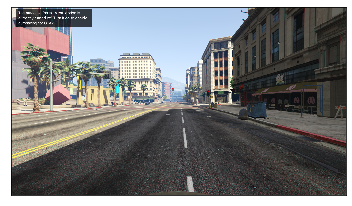

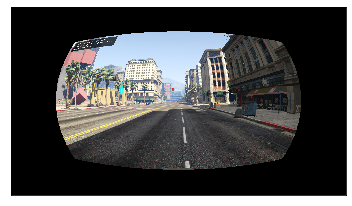

In [3]:
# display original image
figure = 0
plt.figure(figure)
plt.xticks(())
plt.yticks(())
plt.imshow(g_img)
figure += 1

# fish image
fishimg = fish(g_img, get_fish_xn_yn, distortion_coefficient=-0.5)
imageio.imwrite(g_dst_fish_img, fishimg)
plt.figure(figure)
plt.xticks(())
plt.yticks(())
plt.imshow(fishimg)
figure += 1

# unfish image
# unfishimg = fish(fishimg, get_unfish_xn_yn, distortion_coefficient=-0.3)
# plt.figure(figure)
# plt.xticks(())
# plt.yticks(())
# plt.imshow(unfishimg)
# plt.show()